# Tâche n°8 : Vitesse du son

In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.phonon import plotter
from pymatgen.phonon.plotter import PhononBSPlotter
import matplotlib.pyplot as plt
import numpy as np

with MPRester("yDHrTj9RRkoKjTjOFwD0btKpsIOcE65N") as m:

    
    structure = m.get_structure_by_material_id("mp-20072")
    ph_struct = m.get_phonon_bandstructure_by_material_id("mp-20072")

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

1. Analyse de la structure de bandes de phonons et de la zone de Brillouin 

Suite à l'analyse de ces deux graphes, on peut dire que le point Γ (Gamma) est prise comme référence pour étudier les modes acoustiques, car il correspond au centre de la zone de Brillouin (où le vecteur d'onde q = 0). À ce point précis, les modes acoustiques, qui sont les bandes de phonons les plus basses (bandes 1, 2 et 3 dans les graphes), présentent une dispersion linéaire caractéristique à faible énergie. Cette linéarité est une conséquence directe du comportement des vibrations à grandes longueurs d'onde (c'est-à-dire faibles valeurs du vecteur d'onde). 

Concrètement dans les graphes on a que :

Le premier graphique (bandes de phonons) montre clairement que les fréquences des trois bandes acoustiques démarrent à zéro exactement au point Γ et augmentent linéairement en s'éloignant de ce point dans différentes directions.

Le deuxième graphique (zone de Brillouin) met en évidence les directions privilégiées partant de Γ (comme Γ → X, Γ → Z, Γ → L). Ces directions correspondent à différentes orientations dans le cristal.

Donc le point Γ c'est à cet endroit précis que les fréquences sont nulles, et que la dispersion (donc la vitesse du son) peut être facilement calculée et comparée dans différentes directions cristallines.

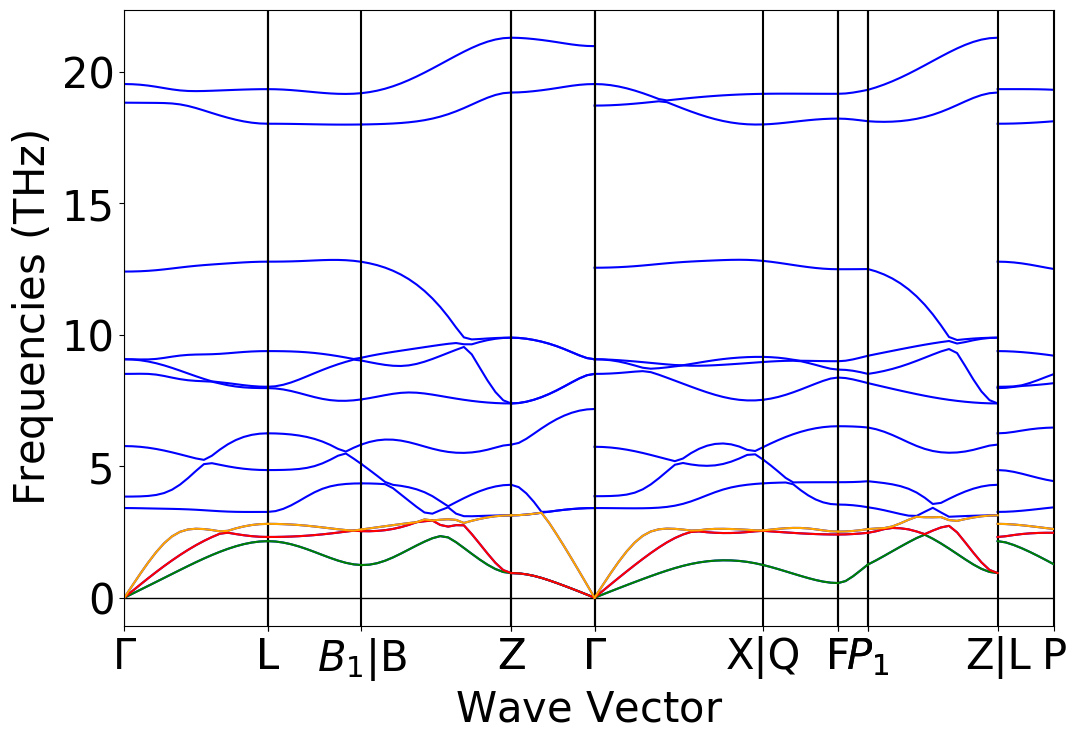

In [2]:
#Affichage de la structure de bande des phonons
ph_bandstruct_plot = plotter.PhononBSPlotter(ph_struct)

data = ph_bandstruct_plot.bs_plot_data()

absc = data.get('distances')
ordo = data.get('frequency')

ph_bandstruct_plot.get_plot()

# Affichage des trois branches acoustiques différentes pour lesquelles la vitesse du son sera calculée
for i in range(len(absc)):
    plt.plot(absc[i], ordo[i][0], color = 'green')
    plt.plot(absc[i], ordo[i][1], color = 'red')
    plt.plot(absc[i], ordo[i][2], color = 'orange')
    

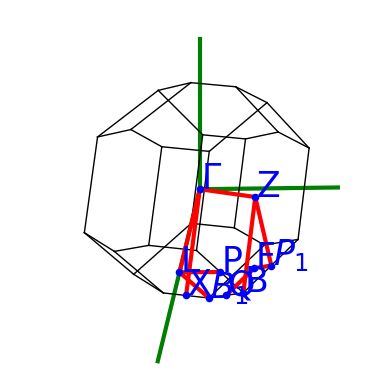

In [3]:
#affichage de la zone de Brillouin 
ph_plt = PhononBSPlotter(ph_struct)
ph_plt.plot_brillouin()

2. Calcul de la vitesse du son 

La vitesse du son dans un matériau peut être calculée à partir de sa structure de bandes de phonons sous l'hypothèse d'une grande longueur d'onde, c’est-à-dire lorsque le vecteur d’onde ($q$) est proche de zéro. Dans ce régime, la relation de dispersion des phonons est quasiment linéaire et peut être écrite sous la forme :

$
\omega(q) \approx v \cdot q \quad \text{lorsque } q \to 0
$

où $v$ est la vitesse du son que l'on souhaite déterminer.

En pratique, on approxime numériquement cette vitesse en calculant la pente des bandes acoustiques (c’est-à-dire les bandes de phonons les plus basses) à proximité du point Γ (où $q = 0$). On utilise pour cela une différence finie :

$
v \approx \left|\frac{\Delta \omega}{\Delta q}\right|
$

où $\Delta \omega$ est la variation de la pulsation (obtenue à partir de la fréquence $f$ par la relation $\omega = 2\pi f$), et $\Delta q$ est la variation du vecteur d'onde. Il est important de convertir correctement les unités des vecteurs d’onde exprimés initialement en angströms (Å⁻¹) en mètres (m⁻¹) avant d'effectuer ce calcul.

Nous effectuons ce calcul pour les trois directions distinctes suivantes dans la zone de Brillouin :

- $\Gamma \to X$
- $\Gamma \to Z$
- $\Gamma \to L$

In [4]:
# Définition de l'angström
ang = 10**(-10)

$\Gamma \to X$

In [5]:
x0 = absc[0][0]/ang ; x1 = absc[0][1]/ang # Il faut bien diviser par ang, car q est exprimé en m^-1  
y0 = 2*np.pi*ordo[0][0][0]*10**(12) ; y1 = 2*np.pi*ordo[0][0][1]*10**(12)


vs = abs((y1-y0)/(x1-x0))
print("La vitesse du son pour la branche considérée vaut", vs, "m/s.\n")

La vitesse du son pour la branche considérée vaut 1752.685374337016 m/s.



 $\Gamma \to Z$

In [6]:
x0 = absc[3][-1]/ang ; x1 = absc[3][-2]/ang 
y0 = 2*np.pi*ordo[3][1][-1]*10**(12) ; y1 = 2*np.pi*ordo[3][1][-2]*10**(12)


vs = abs((y1-y0)/(x1-x0))
print("La vitesse du son pour la branche considérée vaut", vs, "m/s.\n")

La vitesse du son pour la branche considérée vaut 1436.4828994112895 m/s.



$\Gamma \to L$

In [7]:
x0 = absc[4][0]/ang ; x1 = absc[4][1]/ang 
y0 = 2*np.pi*ordo[4][2][0]*10**(12) ; y1 = 2*np.pi*ordo[4][2][1]*10**(12)



vs = abs((y1-y0)/(x1-x0))
print("La vitesse du son pour la branche considérée vaut", vs, "m/s.\n")

La vitesse du son pour la branche considérée vaut 5446.003271077387 m/s.

